## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [9]:
# Columns to replace 0 with NaN
cols_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with np.nan in those columns
diabetes_data[cols_with_missing_values] = diabetes_data[cols_with_missing_values].replace(0, np.nan)

# Confirm changes
diabetes_data[cols_with_missing_values].isnull().sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

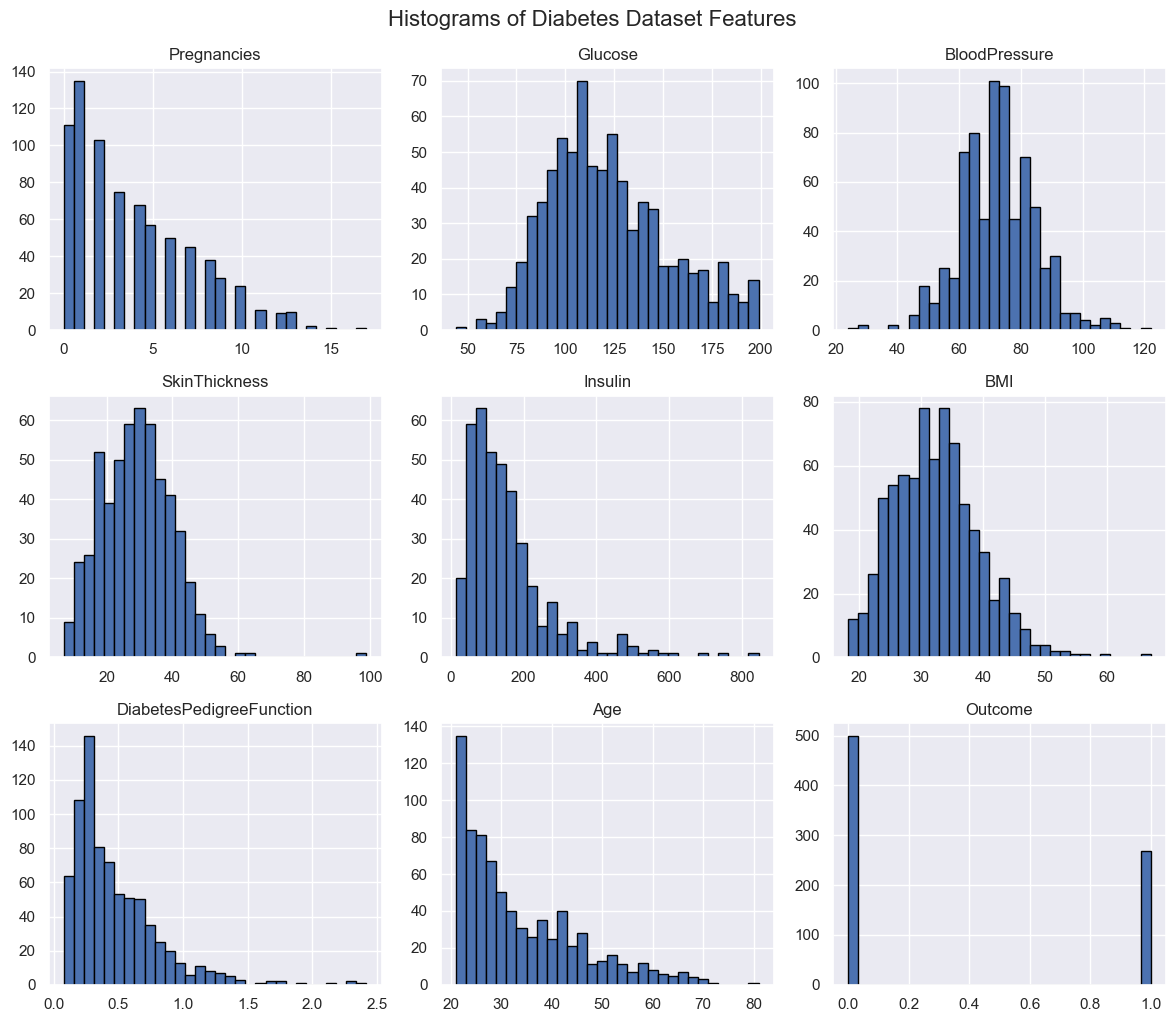

In [11]:
# Set figure size and layout
diabetes_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Diabetes Dataset Features', fontsize=16, y=1.02)
plt.show()

#### Replace the zeros with mean and median values.

In [15]:
#diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
#diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
#diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
#diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
#diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

diabetes_data.fillna({
    'Glucose': diabetes_data['Glucose'].mean(),
    'BloodPressure': diabetes_data['BloodPressure'].mean(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median()
}, inplace=True)


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


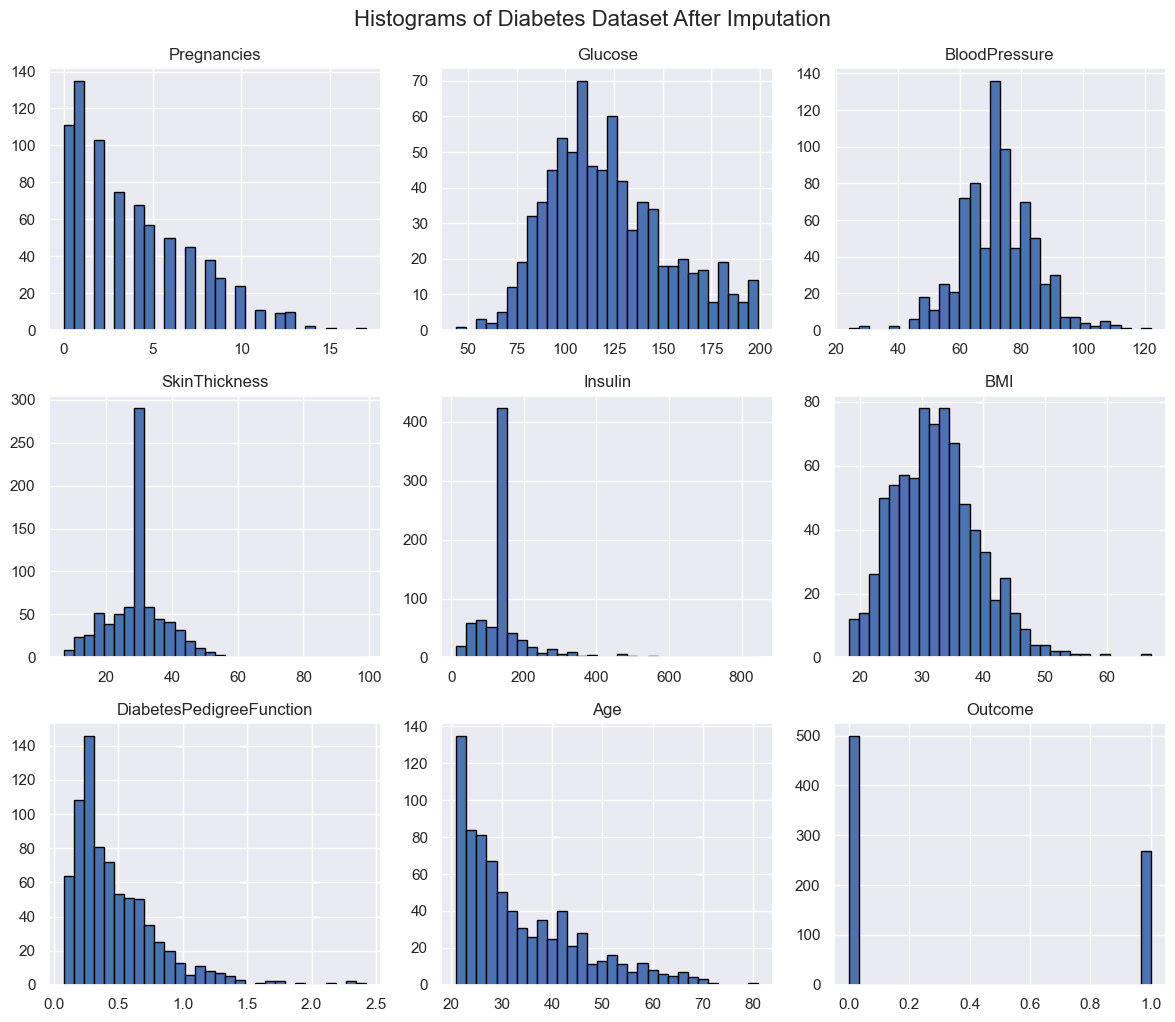

In [17]:
# Confirm there are no NaNs remaining (optional)
print(diabetes_data.isnull().sum())

# Plot updated histograms
diabetes_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Diabetes Dataset After Imputation', fontsize=16, y=1.02)
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


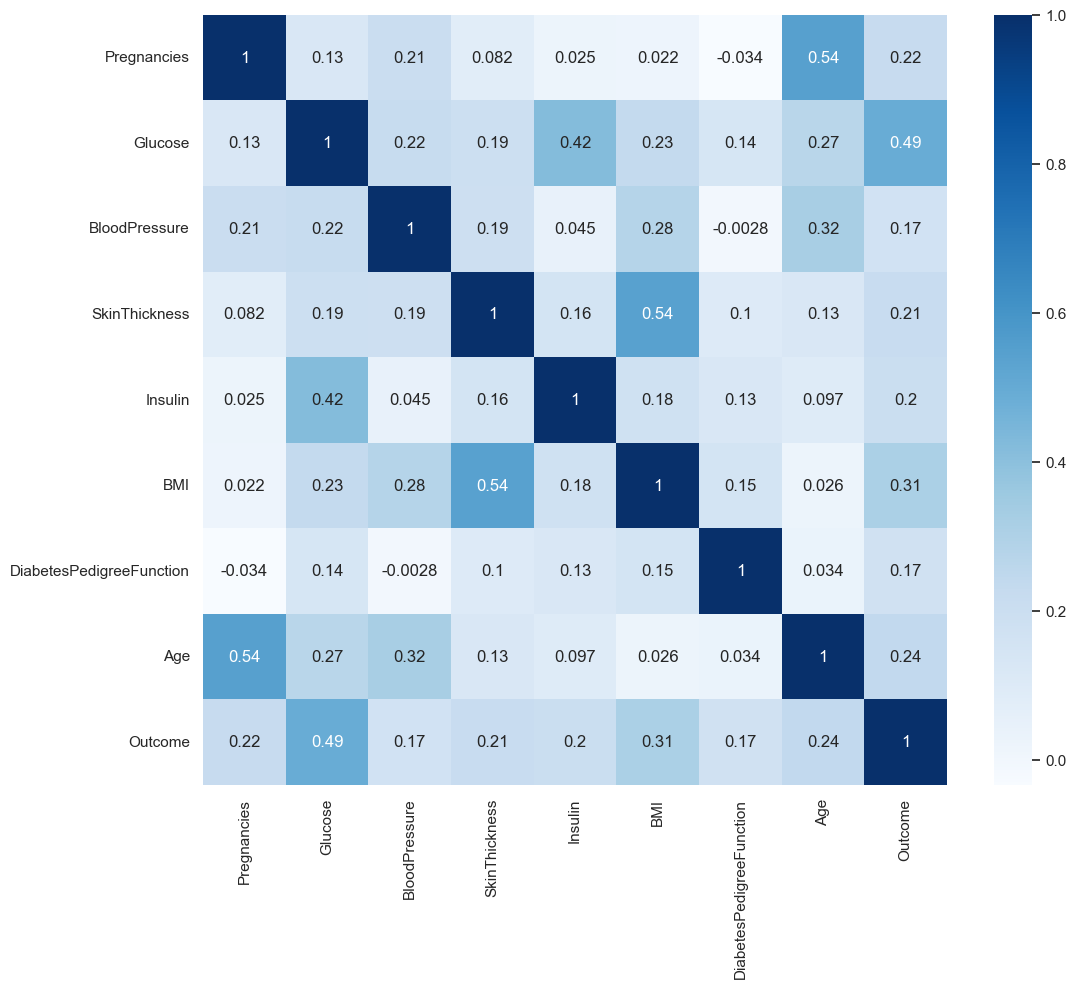

In [19]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [21]:
#Define the y variable 
y = diabetes_data['Outcome']


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [23]:
#Create a 70/30 train and test split.

from sklearn.model_selection import train_test_split

# Define features and target
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

# Create the train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (537, 8)
X_test shape: (231, 8)
y_train distribution:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64
y_test distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [25]:
# Using Sklearn, standarize the magnitude of the features by scaling the values.

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(X_train)

# Transform both train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: confirm the mean and std of scaled training data
print("X_train_scaled mean:", X_train_scaled.mean(axis=0))
print("X_train_scaled std:", X_train_scaled.std(axis=0))


X_train_scaled mean: [ 2.31554895e-17  2.67942093e-16  1.81935989e-16  1.90205807e-16
 -4.63109791e-17  1.11146350e-15  1.19085375e-16 -2.11707333e-16]
X_train_scaled std: [1. 1. 1. 1. 1. 1. 1. 1.]


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [27]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [29]:
# Print the train and test scores for each iteration.

from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# Try k values from 1 to 10
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"k={i}: Train Score = {train_score:.4f}, Test Score = {test_score:.4f}")


k=1: Train Score = 1.0000, Test Score = 0.7186
k=2: Train Score = 0.8436, Test Score = 0.7229
k=3: Train Score = 0.8622, Test Score = 0.7403
k=4: Train Score = 0.8287, Test Score = 0.7403
k=5: Train Score = 0.8343, Test Score = 0.7446
k=6: Train Score = 0.8101, Test Score = 0.7403
k=7: Train Score = 0.8063, Test Score = 0.7359
k=8: Train Score = 0.8063, Test Score = 0.7489
k=9: Train Score = 0.8007, Test Score = 0.7446
k=10: Train Score = 0.8101, Test Score = 0.7359


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [31]:
# Identify the number of neighbors that resulted in the max score in the training dataset.

# Find the best k for training accuracy
best_k_train = train_scores.index(max(train_scores)) + 1  # +1 because index starts at 0
best_train_score = max(train_scores)

print(f"Best training score: {best_train_score:.4f} at k = {best_k_train}")


Best training score: 1.0000 at k = 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [33]:
# Identify the number of neighbors that resulted in the max score in the testing dataset.

# Find the best k for testing accuracy
best_k_test = test_scores.index(max(test_scores)) + 1  # +1 to offset 0-based index
best_test_score = max(test_scores)

print(f"Best test score: {best_test_score:.4f} at k = {best_k_test}")


Best test score: 0.7489 at k = 8


Plot the train and test model performance by number of neighbors.

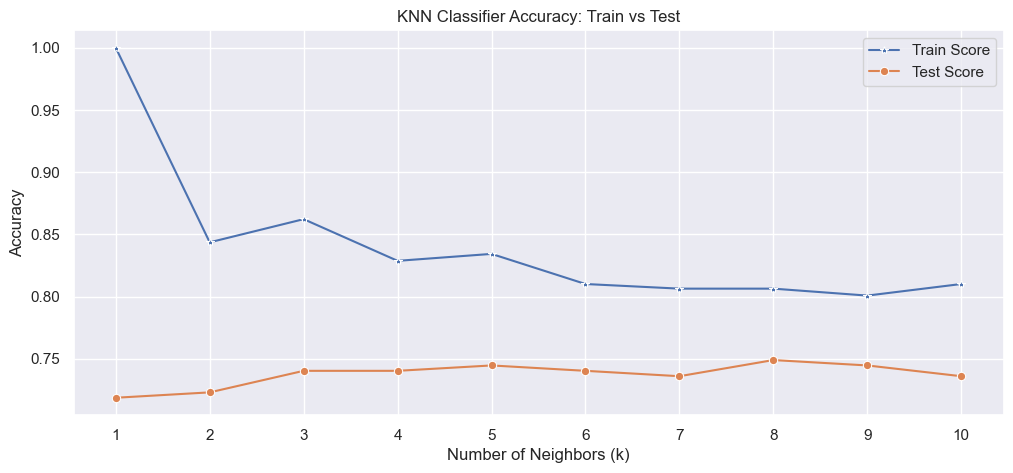

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot train and test scores across k values
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy: Train vs Test')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [39]:
# Fit and score the best number of neighbors based on the plot.

# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize model with k = 8
best_knn = KNeighborsClassifier(n_neighbors=8)

# Fit on training data
best_knn.fit(X_train_scaled, y_train)

# Evaluate accuracy
train_accuracy = best_knn.score(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)

print(f"Final KNN Model (k=8) Train Accuracy: {train_accuracy:.4f}")
print(f"Final KNN Model (k=8) Test Accuracy: {test_accuracy:.4f}")


Final KNN Model (k=8) Train Accuracy: 0.8063
Final KNN Model (k=8) Test Accuracy: 0.7489


In [43]:
#from sklearn.metrics import confusion_matrix
#y_pred = knn.predict(X_test)
#pl = confusion_matrix(y_test,y_pred)

from sklearn.metrics import confusion_matrix

# Predict using the best model (k=8) and the correctly scaled test set
y_pred = best_knn.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[133  17]
 [ 41  40]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

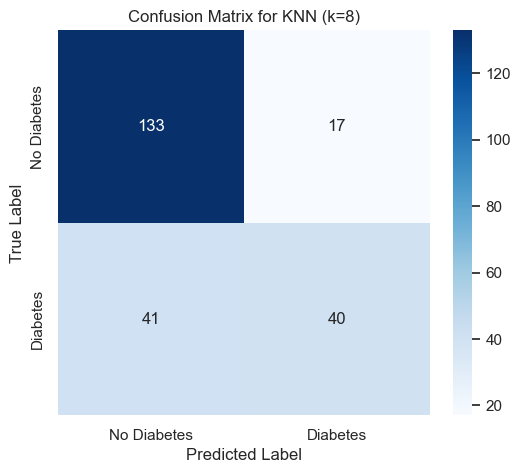

In [45]:
# Plot the confusion matrix for the model fit above.

# Define matrix and labels
cm = np.array([[133, 17],
               [41,  40]])

labels = ['No Diabetes', 'Diabetes']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for KNN (k=8)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [49]:
#Print the classification report

from sklearn.metrics import classification_report

# Generate predictions again if not already done
y_pred = best_knn.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))


Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.76      0.89      0.82       150
    Diabetes       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [53]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [55]:
#  grid search for a Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid: try different numbers of trees
param_grid_rf = {'n_estimators': np.arange(10, 201, 10)}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit on training data (scaled or unscaled, since RF is not sensitive to feature scaling)
rf_cv.fit(X, y)

# Print the best results
print("Best Score: {:.4f}".format(rf_cv.best_score_))
print("Best Parameters:", rf_cv.best_params_)


Best Score: 0.7709
Best Parameters: {'n_estimators': 30}


Best cross-validated accuracy: 0.7709
Optimal number of trees (n_estimators): 30

In [58]:
#Train the final model using this parameter:

from sklearn.ensemble import RandomForestClassifier

# Final model with best parameter
rf_final = RandomForestClassifier(n_estimators=30, random_state=42)
rf_final.fit(X_train, y_train)

# Evaluate on test data
train_acc = rf_final.score(X_train, y_train)
test_acc = rf_final.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9981
Test Accuracy: 0.7576


In [60]:
# Print confusion matrix and classification report (similar to KNN):

from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = rf_final.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=["No Diabetes", "Diabetes"]))



Confusion Matrix:
 [[130  20]
 [ 36  45]]

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.78      0.87      0.82       150
    Diabetes       0.69      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



Based on the study,

No Diabetes: precision 0.78, recall 0.87 — the model is strong at identifying negative cases.

Diabetes: precision 0.69, recall 0.56 — slightly better than KNN's 0.49 recall, but still misses ~44% of actual diabetic cases.

Random Forest slightly outperforms KNN on test data, but:

Its training accuracy is extremely high, suggesting possible overfitting.

Recall for the diabetic class is still low, meaning many actual diabetic cases are misclassified.



This project aimed to classify individuals as diabetic or non-diabetic using features from the Pima Indians Diabetes dataset. 
We evaluated two supervised classification models:

1) K-Nearest Neighbors (KNN)

2) Random Forest Classifier

Random Forest performed slightly better than KNN in terms of overall accuracy and recall for diabetic cases.

However, it showed clear signs of overfitting, with perfect or near-perfect training accuracy but relatively lower test performance.

Both models struggled to correctly classify diabetic patients, which is critical for this use case.

